Punto inicial: [  2 -10]
Mínimo encontrado: [-2.03684201 -2.03691138]
Valor en el mínimo: 1.5420750333482571
Iteraciones: 598
--------------------------------------------------
Punto inicial: [-50   5]
Mínimo encontrado: [-2.03691163 -2.03684176]
Valor en el mínimo: 1.5420750333517583
Iteraciones: 673
--------------------------------------------------
Punto inicial: [ 26 -10]
Mínimo encontrado: [2.03691165 2.03684175]
Valor en el mínimo: 1.5420750333519744
Iteraciones: 652
--------------------------------------------------


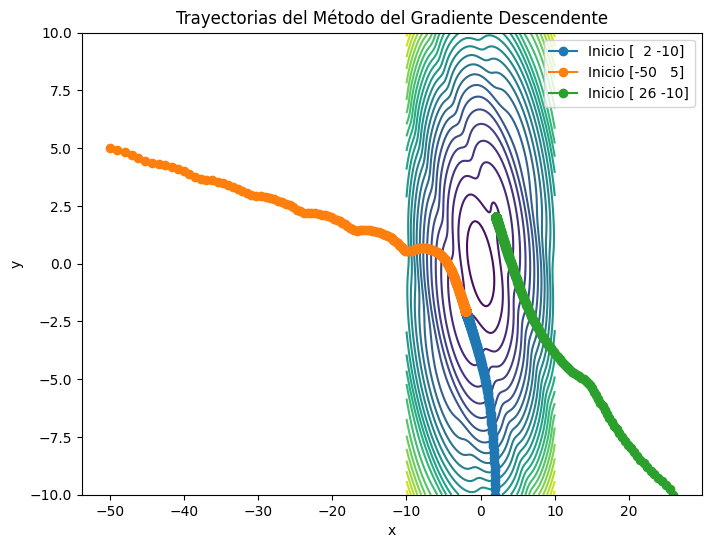

In [8]:
# ==========================================
# MÉTODO DEL GRADIENTE DESCENDENTE
# ==========================================
import numpy as np
import matplotlib.pyplot as plt

# Función objetivo
def f(x, y):
    return 1 / (2 + np.cos(x + y)) + ((x - y)**2 + (x + y)**2) / 20

# Gradiente de f
def grad_f(x, y):
    df_dx = np.sin(x + y) / (2 + np.cos(x + y))**2 + x / 5
    df_dy = np.sin(x + y) / (2 + np.cos(x + y))**2 + y / 5
    return np.array([df_dx, df_dy])

# Parámetros del algoritmo
alpha = 0.1       # tamaño de paso
eps = 1e-6         # tolerancia
max_iter = 1000    # máximo número de iteraciones

# Diferentes puntos de inicio
puntos_iniciales = [np.array([2, -10]), np.array([-50, 5]), np.array([26, -10])]
resultados_grad = []

for x0 in puntos_iniciales:
    x = x0.copy()
    trayectoria = [x.copy()]
    
    for i in range(max_iter):
        g = grad_f(x[0], x[1])
        x_new = x - alpha * g
        trayectoria.append(x_new.copy())
        
        if np.linalg.norm(x_new - x) < eps:
            break
        x = x_new
    
    resultados_grad.append({
        "inicio": x0,
        "minimo": x,
        "valor_minimo": f(x[0], x[1]),
        "iteraciones": i+1,
        "trayectoria": np.array(trayectoria)
    })

# Mostrar resultados
for r in resultados_grad:
    print("Punto inicial:", r["inicio"])
    print("Mínimo encontrado:", r["minimo"])
    print("Valor en el mínimo:", r["valor_minimo"])
    print("Iteraciones:", r["iteraciones"])
    print("-"*50)

# Gráfica del descenso
x_vals = np.linspace(-10, 10, 200)
y_vals = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

plt.figure(figsize=(8,6))
plt.contour(X, Y, Z, levels=30, cmap='viridis')

for r in resultados_grad:
    T = r["trayectoria"]
    plt.plot(T[:,0], T[:,1], 'o-', label=f'Inicio {r["inicio"]}')

plt.title("Trayectorias del Método del Gradiente Descendente")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


Punto inicial: [  2 -10]
Mínimo encontrado: [-2.03671733 -2.03703606]
Valor en el mínimo: 1.5420750381873298
Iteraciones: 100
--------------------------------------------------
Punto inicial: [-50   5]
Mínimo encontrado: [-2.03760713 -2.03614626]
Valor en el mínimo: 1.5420751398157448
Iteraciones: 100
--------------------------------------------------
Punto inicial: [ 26 -10]
Mínimo encontrado: [2.0373548  2.03639859]
Valor en el mínimo: 1.5420750788245856
Iteraciones: 100
--------------------------------------------------


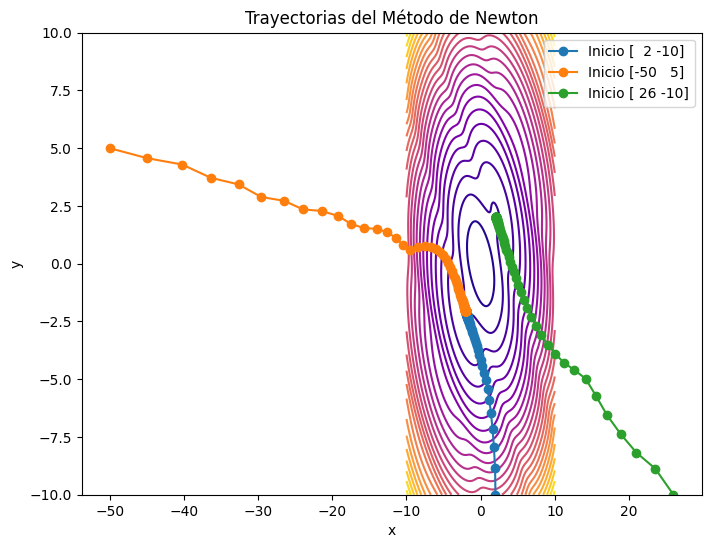

In [4]:
# ==========================================
# MÉTODO DE NEWTON
# ==========================================
import numpy as np
import matplotlib.pyplot as plt

# Función objetivo
def f(x, y):
    return 1 / (2 + np.cos(x + y)) + ((x - y)**2 + (x + y)**2) / 20

# Gradiente
def grad_f(x, y):
    df_dx = np.sin(x + y) / (2 + np.cos(x + y))**2 + x / 5
    df_dy = np.sin(x + y) / (2 + np.cos(x + y))**2 + y / 5
    return np.array([df_dx, df_dy])

# Hessiana
def hessiana_f(x, y):
    return np.array([[2, 0],
                        [0, 2]])

# Parámetros
eps = 1e-6
max_iter = 100
puntos_iniciales = [np.array([2, -10]), np.array([-50, 5]), np.array([26, -10])]
resultados_newton = []

for x0 in puntos_iniciales:
    x = x0.copy()
    trayectoria = [x.copy()]
    
    for i in range(max_iter):
        g = grad_f(x[0], x[1])
        H = hessiana_f(x[0], x[1])
        delta = np.linalg.solve(H, g)   # Resuelve H * delta = grad
        x_new = x - delta
        trayectoria.append(x_new.copy())
        
        if np.linalg.norm(x_new - x) < eps:
            break
        x = x_new
    
    resultados_newton.append({
        "inicio": x0,
        "minimo": x,
        "valor_minimo": f(x[0], x[1]),
        "iteraciones": i+1,
        "trayectoria": np.array(trayectoria)
    })

# Mostrar resultados
for r in resultados_newton:
    print("Punto inicial:", r["inicio"])
    print("Mínimo encontrado:", r["minimo"])
    print("Valor en el mínimo:", r["valor_minimo"])
    print("Iteraciones:", r["iteraciones"])
    print("-"*50)

# Gráfica
x_vals = np.linspace(-10, 10, 200)
y_vals = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

plt.figure(figsize=(8,6))
plt.contour(X, Y, Z, levels=30, cmap='plasma')

for r in resultados_newton:
    T = r["trayectoria"]
    plt.plot(T[:,0], T[:,1], 'o-', label=f'Inicio {r["inicio"]}')

plt.title("Trayectorias del Método de Newton")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [9]:
# ==========================================
# COMPARACIÓN ENTRE MÉTODOS
# ==========================================
import pandas as pd

comparacion = []

for g, n in zip(resultados_grad, resultados_newton):
    comparacion.append({
        "Inicio": str(g["inicio"]),
        "Iteraciones Gradiente": g["iteraciones"],
        "Iteraciones Newton": n["iteraciones"],
        "Mínimo Gradiente": np.round(g["minimo"], 4),
        "Mínimo Newton": np.round(n["minimo"], 4)
    })

df = pd.DataFrame(comparacion)
print(df)


      Inicio  Iteraciones Gradiente  Iteraciones Newton    Mínimo Gradiente  \
0  [  2 -10]                    598                 100  [-2.0368, -2.0369]   
1  [-50   5]                    673                 100  [-2.0369, -2.0368]   
2  [ 26 -10]                    652                 100    [2.0369, 2.0368]   

        Mínimo Newton  
0   [-2.0367, -2.037]  
1  [-2.0376, -2.0361]  
2    [2.0374, 2.0364]  
